# WeatherPy
----

### Analysis
* It appears that temperature does correlate with latitude position with those near the equator having the same max tempurature as those in the southern hemisphere who are currently in the middle of their summer. Tempuratures drops massivly once latitude goes in the positive numbers showing that it is indeed winter in the northern hemisphere. The chart shows slightly tighter groping around 0 latitude but I do not beleive this is signifigant.
* Within this sample group it is hard to say if there is any connection between humidity and latitude. There does not appear to be a strong connection but we only see the lowest scores in humidity in the highest latitudes. However, both sides of the latitutde spectrum contain most of the humidity scores 
* There is absolutly no relationship with latitude and cloudiness. 
* There does not appear to be much if any relationship between latitutde and wind speed but again the highest scores all fall in the higher latitude measurments. I do not see enough of this to be signifigant however and it is probably just the sample bias considering cities were randomized and there is far more cities above the equator than below which may have led to overrepsentation of the northern latitudes. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# Due to limits on the API call I divided the cities into set sof 49 since only 50 are allowed at a time.

cities50 = cities[:50]
cities100 = cities [50:100]
cities150 = cities [:150]
cities200 = cities [:200]
cities250 = cities [:250]
cities300 = cities [:300]
cities350 = cities [:350]
cities400 = cities [:400]
cities450 = cities [:450]
cities500 = cities [:500]
cities550 = cities [:550]
cities600 = cities [:600]

len(cities100)


50

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up the api syntax
units = 'imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + city).json() #test
response #test was a sucess lets see if we can loop it

city_list = []
temp_list = []
lat_list = []
cloudiness_list = []
wind_speed_list = []
humidity_list = []
#loop through cities and hope the delay of cities found and poor internet means you wont go over 50/s limit
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        temp_list.append(response["main"]["temp_max"])
        lat_list.append(response["coord"]["lat"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        humidity_list.append(response["main"]["humidity"])
    except:
        print(f"city not found {city}")
        pass

df = pd.DataFrame({"City": city_list, "Max Temp": temp_list, "Lat": lat_list, "Humidity": humidity_list, "Cloudiness": cloudiness_list, "Wind Speed": wind_speed_list})

city not found bengkulu
city not found taolanaro
city not found sedelnikovo
city not found warqla
city not found vaitupu
city not found mys shmidta
city not found tenosique
city not found lolua
city not found illoqqortoormiut
city not found attawapiskat
city not found bairiki
city not found bargal
city not found samusu
city not found olafsvik
city not found grand river south east
city not found sentyabrskiy
city not found barentsburg
city not found duz
city not found nizhneyansk
city not found belushya guba
city not found loubomo
city not found sirisia
city not found tumannyy
city not found skalistyy
city not found odweyne
city not found aktash
city not found palabuhanratu
city not found bousso
city not found manzil tamim
city not found zhaocheng
city not found lalomanu
city not found kawana waters
city not found stoyba
city not found tsihombe
city not found longlac
city not found acarau
city not found aflu
city not found ayer itam
city not found azimur
city not found galiwinku
city no

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:

df.to_csv("cities_data.csv", index=False)
len(df)

544

In [7]:
df.head()

,City,Max Temp,Lat,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,-28.24,77.48,100,0,8.75
1,Dzilam Gonzalez,72.43,21.28,90,92,6.06
2,Gizo,59.00,31.80,66,40,11.41
3,Kapaa,78.98,22.08,62,90,8.05
4,Busselton,59.74,-33.64,100,0,20.49


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

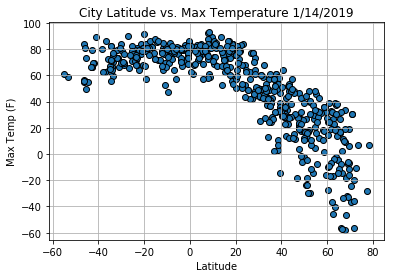

In [18]:
plt.title("City Latitude vs. Max Temperature 1/14/2019")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=None, which='major', axis='both')
plt.scatter(x = df["Lat"], y = df["Max Temp"], edgecolor="black")

#### Latitude vs. Humidity Plot

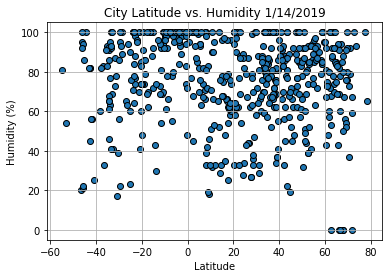

In [19]:
plt.title("City Latitude vs. Humidity 1/14/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None, which='major', axis='both')
plt.scatter(x = df["Lat"], y = df["Humidity"], edgecolor="black")

#### Latitude vs. Cloudiness Plot

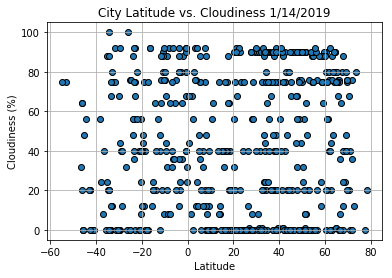

In [20]:
plt.title("City Latitude vs. Cloudiness 1/14/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None, which='major', axis='both')

plt.scatter(x = df["Lat"], y = df["Cloudiness"], edgecolor="black")

#### Latitude vs. Wind Speed Plot

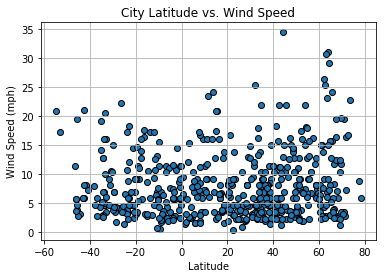

In [21]:
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None, which='major', axis='both')

plt.scatter(x = df["Lat"], y = df["Wind Speed"], edgecolor="black")